<a href="https://colab.research.google.com/github/laurabersani/MLPNS_LBersani/blob/main/NeuralNetwork_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl

In [2]:
#creo un piccolo set di osservazioni e varibili booleane
X = np.array(
    [[0,0,1],
     [1,1,1],
     [1,0,1],
     [0,1,1]]
)
#nota: creando un set di dati diverso da questo non è detto che converga

(-0.5, 2.5, 3.5, -0.5)

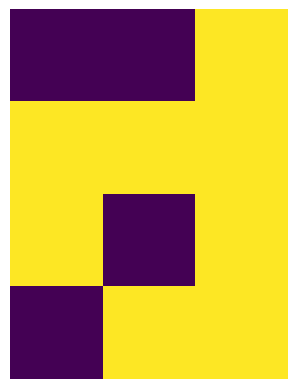

In [3]:
pl.imshow(X)
pl.axis("off")

In [4]:
y=np.array([[0,1,1,0]]).T #metodo rapido per crearlo verticale
y

array([[0],
       [1],
       [1],
       [0]])

In [5]:
print("imput\n", X)
print("output\n", y)

imput
 [[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
output
 [[0]
 [1]
 [1]
 [0]]


#basic archtecture: 1 layer
4 osservazioni, 3 neuroni, 1 layer

(Ho 3 input, 1 output e 4 esempi da cui imparare)

Il mio output sarà una probabilità, con risultati tra 0 e 1. è definito da un sigmoide.

In [6]:
def sigmoid(x):
  return 1./(1.+ np.exp(-x))

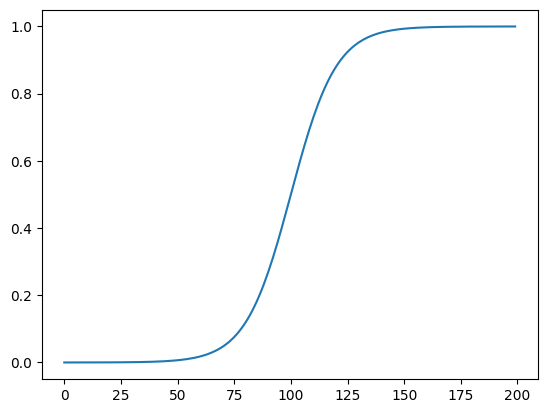

In [7]:
pl.plot(sigmoid(np.arange(-10, 10, 0.1)))

In [8]:
def loss(prediction, target): #come in tutti i modelli di ML dobbiamo definire una loss function. Non è molto bella, ma ce la teniamo. 
  return target-prediction

In [9]:
def dsigmoid(x): #la derivata della active function
  return x*(1.-x) #uso x invece di sigmoid, questo perchè gli passerò una x sigmoid

#Neural Network

In [10]:
#assegno un punto di partenza a caso ai miei weight
#setto il seed
np.random.seed(302)
#stabiliamo i numero di iterazion che vogliamo fare, detto numero di epoche.
training=6000 

In [11]:
#layer if synopses/neuron
#che sono delle numpy arrays. 
#4 x 3 come imputs, cioè ho 4 esempi per ogni neurone in input
np.random.seed(302)
syn0=2*np.random.random((3,1))-1
#syn0 è la matrice dei pesi. Sarà data dal (numero di neuroni al 1° layer) x (n di output), in questo caso 3x1
syn0.shape
print(syn0)


#inizio il training
loss_output=[]

for i in range(training): #itero 6000 volte cercando di minimizzare gli errori
  imputLayers=X

  #forward propagation-->
  #linear regression
  ll=np.dot(imputLayers, syn0)
  output=sigmoid(ll)

  #backpropagation-->
  #come calcolo l'errore 
  output_error =loss(output,y)
  loss_output.append(np.abs(output_error).sum())
 
  #Calcolo la correzione. se sono in una regione piatta avrò un errore più grave
  output_delta=output_error * dsigmoid(output)
  #applico la correzione ai pesi
  syn0 += np.dot(imputLayers.T, output_delta)
  #stiamo facendo backpropagation, è una correzione per iterazione sui pesi inizialemente casuali, usiamo il gradiente 

print('output training\n', output)
print('output target\n', y)

[[ 0.27256242]
 [ 0.65008468]
 [-0.31671053]]
output training
 [[0.01254551]
 [0.98977455]
 [0.99169035]
 [0.0101995 ]]
output target
 [[0]
 [1]
 [1]
 [0]]


In [12]:
output_error.shape

(4, 1)

Text(0, 0.5, 'Global loss')

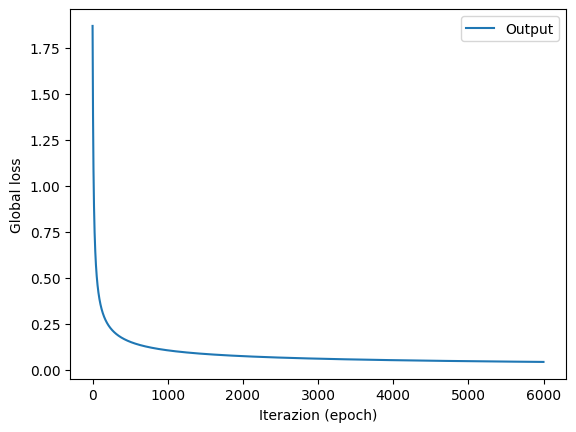

In [13]:
pl.plot(loss_output, label="Output")
pl.legend()
pl.xlabel("Iterazion (epoch)")
pl.ylabel("Global loss")

In [14]:
#per aggiungere più layer:
#Ricrdarsi che la dimensione di un layer, es 2x3, deve essere poi la dimensione degli imput del layer successivo.
#qui il layer sono matrici che servono per calcolare i pesi. 

In [15]:
syn0=2*np.random.random((3,4))-1
syn0

array([[ 0.47927851, -0.06168623,  0.08558127,  0.09133313],
       [-0.7367975 , -0.69357809, -0.48670618, -0.12373802],
       [-0.92147466,  0.52732938,  0.65817185, -0.50538898]])

In [18]:
#Due layer:

np.random.seed(302)

#4 x 3 come imputs, cioè ho 4 esempi per ogni (3) neurone in input
#Uso la stessa matrice InputLayer

#Secondo layer, 5 neuroni, la dimensione dell'output è 4x5. 
#La matrice dei pesi sarà 3x5
#La inizializzo random
syn1=2*np.random.random((3,5))-1

#ora da 5 neuroni passo a un output solo. Il secondo step vorrà una matrice di pesi 5x1
syn2=2*np.random.random((5,1))-1

#syn0.shape
#print(syn0)


#inizio il training
loss_output1=[]
loss_output2=[]

for i in range(training): #itero 6000 volte cercando di minimizzare gli errori
  imputLayers=X

  #forward propagation-->
  #Creo l'output dal primo layer di neuroni
  l1=np.dot(imputLayers, syn1)
  output1=sigmoid(l1)

  #Secondo layer:
  l2=np.dot(output1, syn2)
  output2=sigmoid(l2)

  #backpropagation-->
  #calcolo l'errore 
  output_error=loss(output2,y)
  loss_output2.append(np.abs(output_error).sum())
 
  #Calcolo la correzione. 
  output_delta2=output_error * dsigmoid(output2)
  #applico la correzione ai pesi
  syn2 += np.dot(output1.T, output_delta2)

  output_delta1=np.dot(output_delta2,syn2.T)*dsigmoid(output1)

  syn1 += np.dot(imputLayers.T, output_delta1)
   

print('output training\n', output2)
print('output target\n', y)
#manca da plottare la loss function

output training
 [[0.00647676]
 [0.99373684]
 [0.99426579]
 [0.0049099 ]]
output target
 [[0]
 [1]
 [1]
 [0]]


#Tensorflow
Automatizziamo il tutto con tensorflow

In [19]:
from tensorflow import keras

In [21]:
#settiamo il tipo di layer da usar. Dense se vogliamo che tutti i neuroni siano connessi a tutti gli altri.
hlayer=keras.layers.Dense(5, input_dim=3, activation="sigmoid") #setto l'hidden layer
#5, n di neuroni nel layer; 3 n di neuroni di imput, e poi gli devo dare la func di attivazione
#Nota: se la rete neurale è di regressione, ha un output solo. 
olayer=keras.layers.Dense(1, activation="linear") #output
model=keras.Sequential([hlayer,olayer]) #usiamo il modello che lega i layer, li concatena autoaticamente.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss="mae", optimizer="adam", metrics=["accuracy"]) #facciamo compilare il modello. Ci aggiungiamo tutte le indicazioni che ancora non abbiamo inserito: 
#la loss function (mean absolute error); l'algoritmo di gradient descend (adam); metrica

In [23]:
#gli passo il set di dati, il target, il numero di epoche
model.fit(X, y, epochs=1000)
#nota: se lo faccio ri-runnare riparte dai pesi che ha fittato per ultimo

Epoch 1/1000
1/1 [==============================] - 1s 778ms/step - loss: 0.5579 - accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.5572 - accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.5566 - accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.5563 - accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.5557 - accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.5553 - accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.5549 - accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.5545 - accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.5541 - accuracy: 0.5000
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.5537 - accuracy: 0.5000
Epoch 11/1000
1/1

In [24]:
model.predict(X)

1/1 [==============================] - 0s 101ms/step


array([[-9.3579292e-04],
       [ 9.9699759e-01],
       [ 9.9871290e-01],
       [-1.2269616e-03]], dtype=float32)